                           Bachelor   1 Bedroom    2 Bedroom    3 Bedroom
Province                                                                 
British Columbia              696.5  733.666667   972.666667   976.000000
Manitoba                      498.0  631.333333   829.666667  1120.666667
New Brunswick                 551.0  589.000000   762.500000   821.000000
Nova Scotia                   617.0  743.666667  1039.333333  1377.500000
Newfoundland and Labrador     532.5  599.333333   720.666667   815.666667
Ontario                       617.0  693.666667   897.000000   922.333333
Quebec                        426.0  467.000000   573.000000   646.000000
Saskatchewan                  625.0  771.000000   883.333333  1087.000000


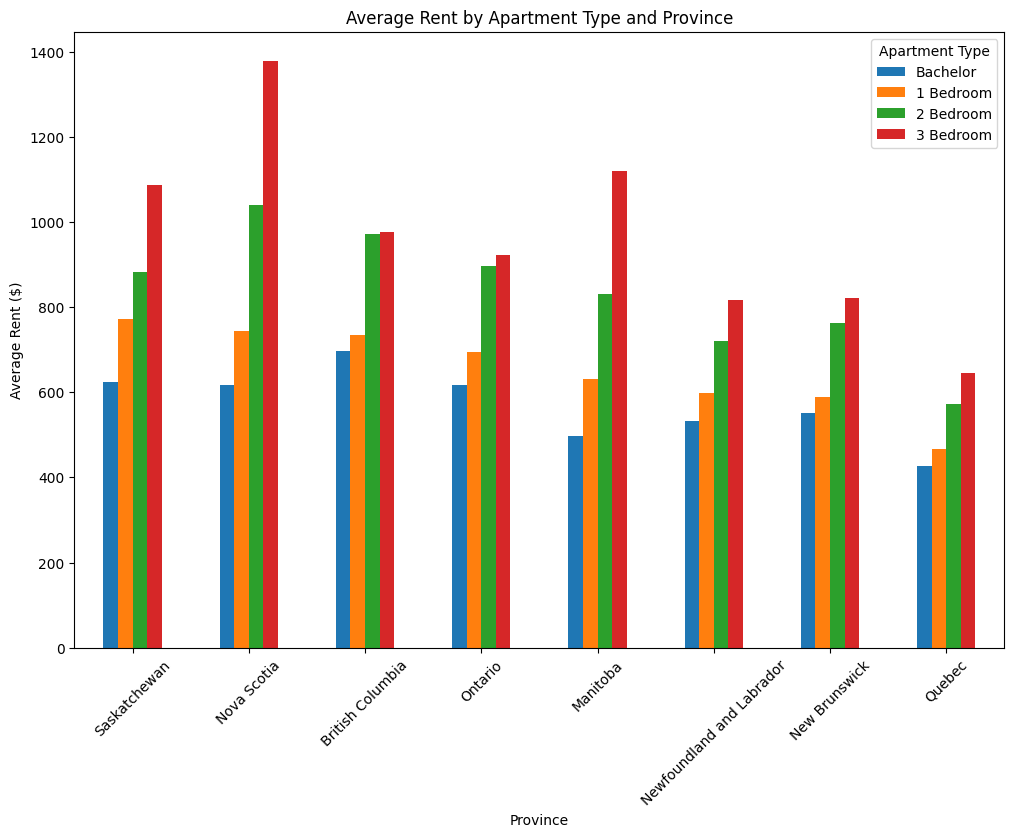

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('../ca-housing-data/rural-rental-market-survey-data-average-rent-province-2020-en.xlsx', engine='openpyxl', skiprows=4, nrows=31)


df.columns = ["Dwelling Type", "Province", "Bachelor", "Bachelor level", "1 Bedroom", "1 Bedroom level", "2 Bedroom", "2 Bedroom level", "3 Bedroom", "3 Bedroom level", "Total", "Total level"]


for col in ["Bachelor", "1 Bedroom", "2 Bedroom", "3 Bedroom", "Total"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


summary_stats = df[["Bachelor", "1 Bedroom", "2 Bedroom", "3 Bedroom", "Total"]].describe()

province_avg = df.groupby("Province")[["Bachelor", "1 Bedroom", "2 Bedroom", "3 Bedroom"]].mean()
province_avg = province_avg.dropna(how='all')
province_avg = province_avg[province_avg.index != "Canada (9 Provinces)"]

province_avg = province_avg.rename(index={
    "Nfld.Lab./T.-N.-L.": "Newfoundland and Labrador",
    "N.S./N.-É.": "Nova Scotia",
    "N.B./N.-B.": "New Brunswick",
    "Que./Qc": "Quebec",
    "Ont./Ont.": "Ontario",
    "Man./Man.": "Manitoba",
    "Sask./Sask.": "Saskatchewan",
    "B.C./C.-B.": "British Columbia",
    "Alta./Alb.": "Alberta"
})
print(province_avg)

province_avg = province_avg.sort_values(by="1 Bedroom", ascending=True)


province_avg.plot(kind="bar", figsize=(12, 8))
plt.title("Average Rent by Apartment Type and Province")
plt.xlabel("Province")
plt.ylabel("Average Rent ($)")
plt.xticks(rotation=45)
plt.legend(title="Apartment Type")
plt.show()